In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the dataset
data = pd.read_csv('Train_UWu5bXk.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

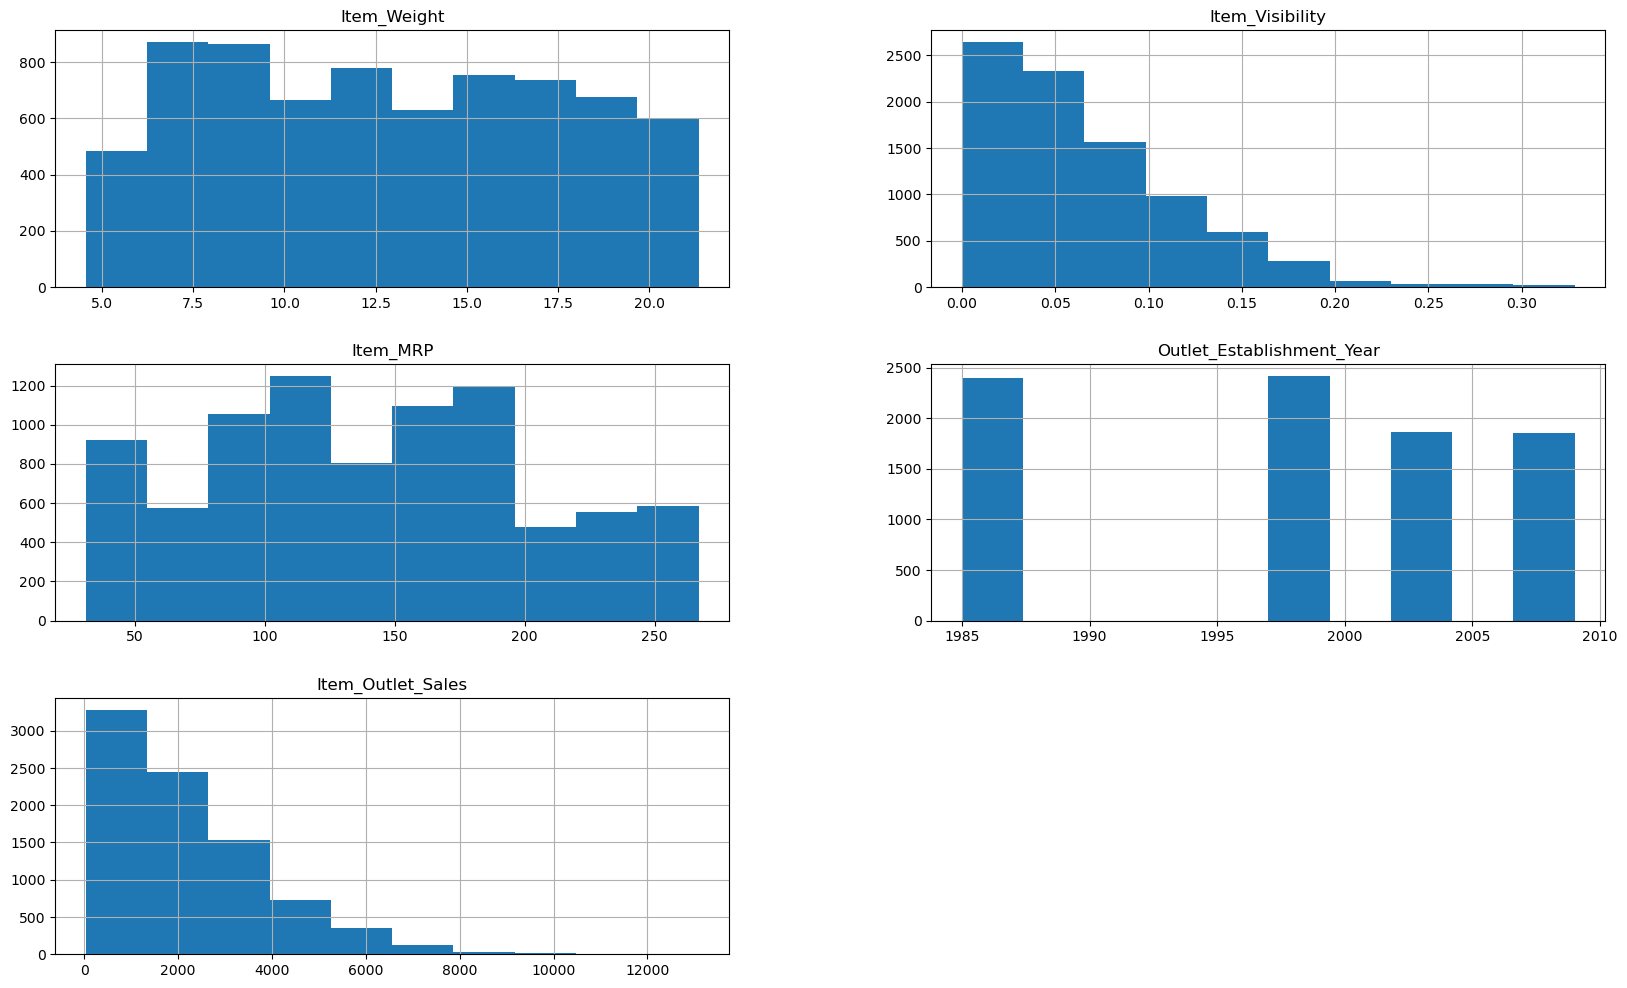

In [3]:
# Visualizing histograms of the dataset
data.hist(figsize=(20, 12))

In [4]:
# Importing necessary libraries
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Selecting features and target variable
X = data[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
y = data['Item_Outlet_Sales']

In [6]:
# Scaling continuous features
X_Scaled = X.copy()
cont_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
scaler = StandardScaler()
X_Scaled = X_Scaled[cont_cols]
X_Scaled = scaler.fit_transform(X_Scaled)
print(X_Scaled)

[[-0.7662174  -0.97073217  1.74745381  0.13954076]
 [-1.49417499 -0.90811123 -1.48902325  1.33410274]
 [ 0.99983356 -0.95691733  0.01004021  0.13954076]
 ...
 [-0.48623371 -0.59978449 -0.89720755  0.73682175]
 [-1.21634502  1.53287976 -0.60797692  1.33410274]
 [ 0.41832897 -0.41193591 -1.05226104 -0.09937163]]


In [7]:
# Replacing original columns with scaled columns
X[cont_cols] = X_Scaled

C:\Users\REZA\AppData\Local\Temp\ipykernel_17196\2296627068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cont_cols] = X_Scaled


In [8]:
# Defining categorical columns indexes
cat_cols_indexes = [1, 3, 5, 7, 8, 9]

In [9]:
# Handling missing values in 'Outlet_Size' column
X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0], inplace=True)

C:\Users\REZA\AppData\Local\Temp\ipykernel_17196\2326025876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0], inplace=True)


In [10]:
# Checking for missing values
X.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2323)

In [12]:
# Creating and fitting the CatBoostRegressor model
model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=8, task_type='GPU', eval_metric='MAE')
model.fit(X_train, y_train, cat_cols_indexes, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 1315.2306008	test: 1276.9035664	best: 1276.9035664 (0)	total: 122ms	remaining: 4m 4s
1:	total: 247ms	remaining: 4m 6s
2:	total: 367ms	remaining: 4m 4s
3:	total: 474ms	remaining: 3m 56s
4:	total: 595ms	remaining: 3m 57s
5:	learn: 1149.4240457	test: 1115.0525575	best: 1115.0525575 (5)	total: 694ms	remaining: 3m 50s
6:	total: 800ms	remaining: 3m 47s
7:	total: 908ms	remaining: 3m 46s
8:	total: 1.01s	remaining: 3m 42s
9:	total: 1.13s	remaining: 3m 43s
10:	learn: 1029.7856696	test: 1002.3260206	best: 1002.3260206 (10)	total: 1.24s	remaining: 3m 44s
11:	total: 1.39s	remaining: 3m 49s
12:	total: 1.49s	remaining: 3m 47s
13:	total: 1.59s	remaining: 3m 45s
14:	total: 1.7s	remaining: 3m 44s
15:	learn: 945.0139237	test: 921.4460934	best: 921.4460934 (15)	total: 1.81s	remaining: 3m 44s
16:	total: 1.92s	remaining: 3m 43s
17:	total: 2.04s	remaining: 3m 44s
18:	total: 2.17s	remaining: 3m 46s
19:	total: 2.31s	remaining: 3m 48s
20:	learn: 885.4009700	test: 865.3459643	best: 865.3459643 (20)	tot

In [13]:
# Standard deviation of the target variable
y.std()

1706.499615733832